In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
taxi_tickets = pd.read_csv('taxi_ticket_data/taxi_tickets_by_ward.csv')
print(taxi_tickets.dtypes)
print(taxi_tickets.shape)
taxi_tickets.head()

Ticket Number              int64
License Plate Number      object
License Plate State       object
License Plate Type        object
Ticket Make               object
Issue Date                object
Violation Location        object
Violation Code            object
Violation Description     object
Badge                     object
Unit                      object
Ticket Queue              object
Hearing Dispo             object
Latitude                 float64
Longitude                float64
Ward                       int64
dtype: object
(261936, 16)


/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Ticket Number,License Plate Number,License Plate State,License Plate Type,Ticket Make,Issue Date,Violation Location,Violation Code,Violation Description,Badge,Unit,Ticket Queue,Hearing Dispo,Latitude,Longitude,Ward
0,55884862,4079TX,IL,TXI,FORD,01/02/2009 10:05 am,5210 N BROADWAY,0964190,EXPIRED METER OR OVERSTAY,8117,20,Paid,Did Not Challenge,41.976507,-87.659944,48
1,54574383,5141TX,IL,TXI,MERC,01/06/2009 06:53 am,4707 N PULASKI,0964170B,"TRUCK,MOTOR HOME, BUS BUSINESS STREET",12769,17,Paid,Did Not Challenge,41.966575,-87.727904,39
2,55388795,25495TX,IL,TXI,MERC,01/05/2009 04:19 am,5721 W EASTWOOD,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",13250,16,Notice,Did Not Challenge,41.964930,-87.770331,38
3,9177658970,25368TX,IL,TXI,OLDS,01/10/2009 10:30 am,6410 N CLAREMONT AV,0964190,EXPIRED METER OR OVERSTAY,197,498,Paid,Did Not Challenge,41.997942,-87.688741,50
4,55835485,3001TX,IL,TXI,FORD,01/01/2009 06:35 pm,36 W 26TH,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,19503,21,Bankruptcy,Did Not Challenge,41.845162,-87.628529,3


## Business Street Ticket Exemptions

According to [Chicago city ordinance](http://www.cityofchicago.org/city/en/depts/fin/supp_info/revenue/parking_your_commercialtruckinchicago.html) taxis are prohibited from parking on business streets in between 2:00am - 7:00am for more than 2 hours, except in certain streets and wards identified as exempt.

The 40th and 50th wards have specific streets which are exempt, but the entire 23rd, 46th, and 49th wards are exempt from the restriction on taxi parking on business streets. However, some taxis are still ticketed under this violation code. The exemption may have been applied later, but will have to look at the ordinance amendments to find out

In [5]:
taxi_bus_st = taxi_tickets[taxi_tickets['Violation Code'] == '0964170B']
print(taxi_bus_st.shape)
taxi_bus_st.head()

(12644, 16)


,Ticket Number,License Plate Number,License Plate State,License Plate Type,Ticket Make,Issue Date,Violation Location,Violation Code,Violation Description,Badge,Unit,Ticket Queue,Hearing Dispo,Latitude,Longitude,Ward
1,54574383,5141TX,IL,TXI,MERC,01/06/2009 06:53 am,4707 N PULASKI,0964170B,"TRUCK,MOTOR HOME, BUS BUSINESS STREET",12769,17,Paid,Did Not Challenge,41.966575,-87.727904,39
16,55571353,5493TX,IL,TXI,CHEV,01/09/2009 06:35 am,5433 N WESTERN,0964170B,"TRUCK,MOTOR HOME, BUS BUSINESS STREET",3357,20,Paid,Liable,41.980131,-87.689240,40
32,55773331,5526TX,IL,TXI,FORD,02/04/2009 06:30 am,6025 WESTERN,0964170B,"TRUCK,MOTOR HOME, BUS BUSINESS STREET",17392,24,Notice,Did Not Challenge,41.809069,-87.911448,0
33,55773397,5526TX,IL,TXI,FORD,02/05/2009 06:30 am,6025 WESTERN,0964170B,"TRUCK,MOTOR HOME, BUS BUSINESS STREET",17392,24,Notice,Did Not Challenge,41.809069,-87.911448,0
46,56067085,2426TX,IL,TXI,FORD,02/17/2009 06:30 am,5412 N DAMEN,0964170B,"TRUCK,MOTOR HOME, BUS BUSINESS STREET",3357,20,Dismissed,Not Liable,41.980032,-87.679598,40


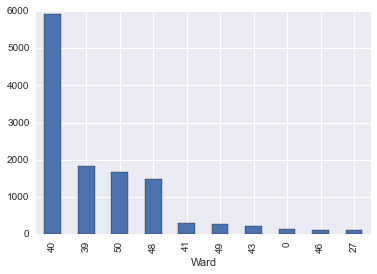

In [7]:
taxi_bus_st_ward = taxi_bus_st.groupby(['Ward'])['Ticket Number'].count()
taxi_bus_st_ward = taxi_bus_st_ward.sort_values(ascending=False)
taxi_bus_st_ward = taxi_bus_st_ward[:10]
taxi_bus_st_ward.plot(kind='bar')

In [10]:
# Count of business street tickets given in wards with exemptions
bus_exempt_ward_tix = taxi_bus_st[taxi_bus_st['Ward'].isin([23,46,49])]
bus_exempt_ward_tix['Ticket Number'].count()

385

In [12]:
# Most recent tickets given in exempt wards for business street tickets
bus_exempt_ward_tix['Issue Date'] = pd.to_datetime(bus_exempt_ward_tix['Issue Date'])
bus_exempt_wards_recent = bus_exempt_ward_tix.sort_values(['Issue Date'], ascending=False)[:10]
bus_exempt_wards_recent['Issue Date']

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


61347    2015-10-13 23:23:00
48878    2015-04-29 08:17:00
235057   2015-04-02 06:30:00
171798   2015-04-02 06:27:00
147203   2015-04-02 06:19:00
86065    2015-04-02 06:18:00
114631   2015-04-02 06:17:00
36592    2015-04-02 06:16:00
106468   2015-04-02 06:15:00
5954     2015-04-02 06:13:00
Name: Issue Date, dtype: datetime64[ns]

### Business Street Exempt Wards

* A significant number of tickets still seem to be given out for taxi business street parking
* Despite this, 56.4% of tickets were not challenged (will need to see if they were given before the exemptions were created)

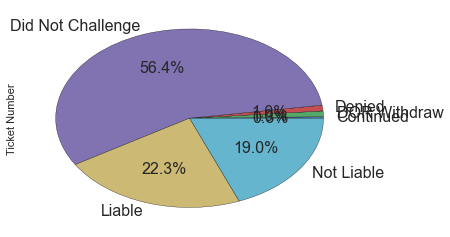

In [13]:
bus_exempt_outcomes = bus_exempt_ward_tix.groupby(['Hearing Dispo'])['Ticket Number'].count()
bus_exempt_outcomes.plot(kind='pie',autopct='%1.1f%%', fontsize=16)